# Bank Churners

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set()
df = pd.read_csv('BankChurners.csv').drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [6]:
df.dtypes


CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [46]:
pd.set_option('display.max_columns', None)
df.rename(columns = {"CLIENTNUM": "Client ID","Customer_Age": "Age","Dependent_count":"IncomeSplit", "Income_Category":"Income Range","Card_Category":"CardType","Months_on_book":"Duration with Bank","Total_Relationship_Count":"Total Products Held","Months_inactive_12_mon":"Months Inactive","Contacts_Count_12_mon":"ContactsLast12Month", "Total_Revolving_Bal":"TotalBalance"},inplace= True)
df.head()

,Client ID,Attrition_Flag,Age,Gender,IncomeSplit,Education_Level,Marital_Status,Income Range,CardType,Duration with Bank,Total Products Held,Months_Inactive_12_mon,ContactsLast12Month,Credit_Limit,TotalBalance,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [17]:
df.describe()

,Client ID,Age,IncomeSplit,Duration with Bank,Total Products Held,Months_Inactive_12_mon,ContactsLast12Month,Credit_Limit,TotalBalance,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [37]:
df_copy = df.copy()
df_copy[["Attrition_Flag"]] = df[["Attrition_Flag"]].replace({"Existing Customer": 1, "Attrited Customer":0})


In [67]:
categorical = ["Gender", "Education_Level","Marital_Status", "CardType","Income Range"]
numerical = ["Duration with Bank", "Total Products Held","Months_Inactive_12_mon", "Credit_Limit","TotalBalance", 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [65]:
len(numerical)


11

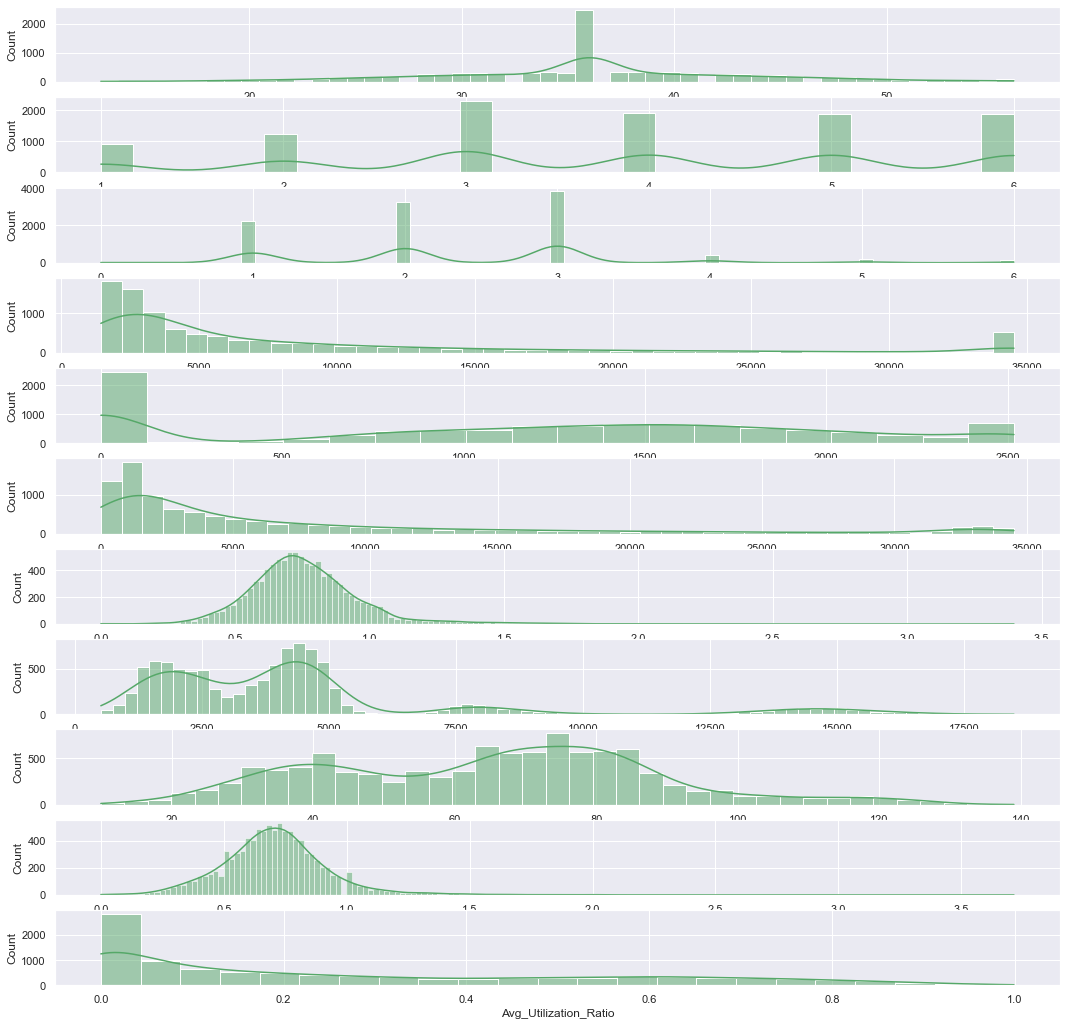

In [70]:
f, axes = plt.subplots(11, 1, figsize=(18,18))
count = 0
for i in df[numerical]:
    sb.histplot(df[i], color='g', ax = axes[count],kde=True)
    count+=1

In [97]:
from sklearn.model_selection import train_test_split


In [113]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 5)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

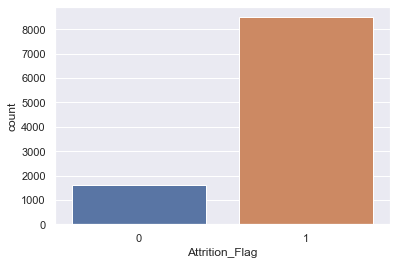

In [98]:
X = df[[ "Credit_Limit","TotalBalance", 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]
y = df_copy[["Attrition_Flag"]]
sb.countplot(data=y, x="Attrition_Flag")

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25)

In [114]:
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(502.20000000000005, 896.94, 'X[5] <= 54.5\ngini = 0.266\nsamples = 7595\nvalue = [1199, 6396]'),
 Text(251.10000000000002, 733.86, 'X[1] <= 615.5\ngini = 0.465\nsamples = 2615\nvalue = [960, 1655]'),
 Text(125.55000000000001, 570.78, 'X[6] <= 0.662\ngini = 0.392\nsamples = 842\nvalue = [617, 225]'),
 Text(62.775000000000006, 407.69999999999993, 'X[4] <= 2052.0\ngini = 0.285\nsamples = 633\nvalue = [524, 109]'),
 Text(31.387500000000003, 244.62, 'X[6] <= 0.566\ngini = 0.428\nsamples = 297\nvalue = [205, 92]'),
 Text(15.693750000000001, 81.53999999999996, 'gini = 0.367\nsamples = 244\nvalue = [185, 59]'),
 Text(47.081250000000004, 81.53999999999996, 'gini = 0.47\nsamples = 53\nvalue = [20, 33]'),
 Text(94.16250000000001, 244.62, 'X[3] <= 1.06\ngini = 0.096\nsamples = 336\nvalue = [319, 17]'),
 Text(78.46875, 81.53999999999996, 'gini = 0.086\nsamples = 332\nvalue = [317, 15]'),
 Text(109.85625000000002, 81.53999999999996, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(188.3250000

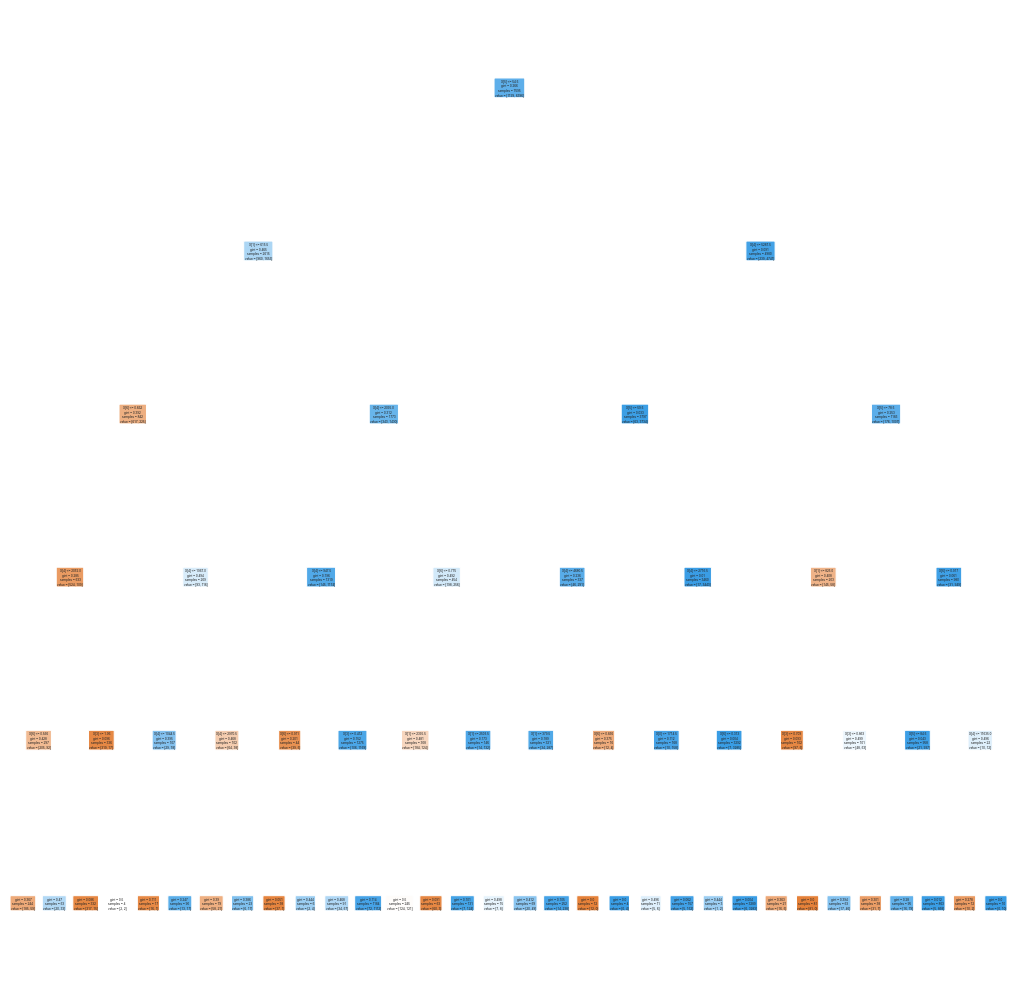

In [117]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(18,18))
plot_tree(dectree, filled=True, rounded=True)

In [118]:
y_pred = dectree.predict(X_test)
print("The Accuracy Score using train data is", dectree.score(X_train,y_train))
print("The Accuracy Score using test data is", dectree.score(X_test,y_test))


The Accuracy Score using train data is 0.9358788676761027
The Accuracy Score using test data is 0.9233807266982622
